In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

In [3]:
data = pd.read_csv("data.csv")
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


## Plot the data

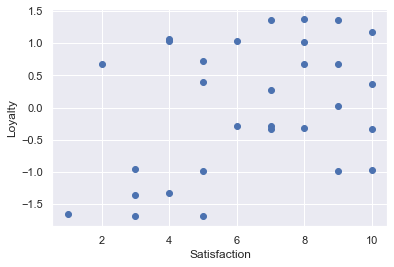

In [5]:
plt.scatter(data["Satisfaction"], data["Loyalty"])
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty");

## Select the features


In [6]:
x = data.copy()

## Clustering

In [7]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

## Clustering Results

In [8]:
clusters = x.copy()
clusters["cluster_pred"] = kmeans.fit_predict(x)

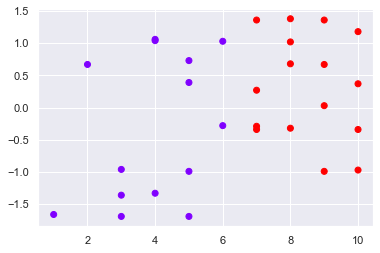

In [10]:
plt.scatter(clusters["Satisfaction"], clusters["Loyalty"], c=clusters["cluster_pred"], cmap="rainbow");

## Standardize the variable

In [11]:
from sklearn import preprocessing

In [13]:
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Elbow Method

In [14]:
wcss = []

for i in range(1, 10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.571285077136385,
 5.326631124753926,
 4.380320178840312,
 3.687975963852466]

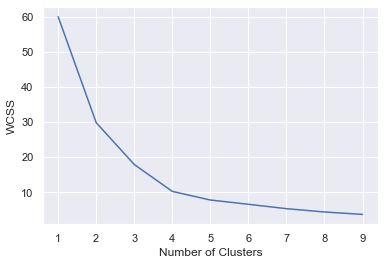

In [15]:
plt.plot(range(1, 10), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS");

In [25]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new["cluster_pred"] = kmeans_new.fit_predict(x_scaled)

In [26]:
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,2
1,6,-0.28,3
2,5,-0.99,2
3,7,-0.29,3
4,4,1.06,0
5,1,-1.66,2
6,10,-0.97,3
7,8,-0.32,3
8,8,1.02,1
9,8,0.68,1


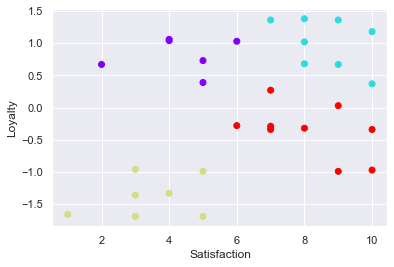

In [27]:
plt.scatter(clusters_new["Satisfaction"], clusters_new["Loyalty"], c=clusters_new["cluster_pred"], cmap="rainbow")
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty");